In [1]:
%load_ext autoreload
%autoreload 2

from DarkMatter import *

Welcome to JupyROOT 6.26/08


In [39]:
d = np.load(const.OUTPUT_DIR+"HAWC_WINO.npy")
d[:,0] = d[:,0]*1000
np.save(const.OUTPUT_DIR+"HAWC_WINO", d)

In [60]:
d1 = np.load(const.OUTPUT_DIR+"EventDisplay_stacked_sys_wino_1D_final_high.npy", allow_pickle=True).item()
d2 = np.load(const.OUTPUT_DIR+"EventDisplay_stacked_sys_wino_1D_final_low.npy", allow_pickle=True).item()

In [62]:
for d in d2.keys():
    d1[d] = d2[d]

In [64]:
np.save(const.OUTPUT_DIR+"EventDisplay_stacked_sys_wino_1D_final.npy", d1)

In [88]:
d = open("../plot-data (1).csv")

In [89]:
data = []
for i, line in enumerate(d.readlines()):
    if i ==0:
        continue
    data.append([float(line.split()[0][:-1]), float(line.split()[1])])
data = np.asarray(data)

In [90]:
data[:,0] = data[:,0]*1000

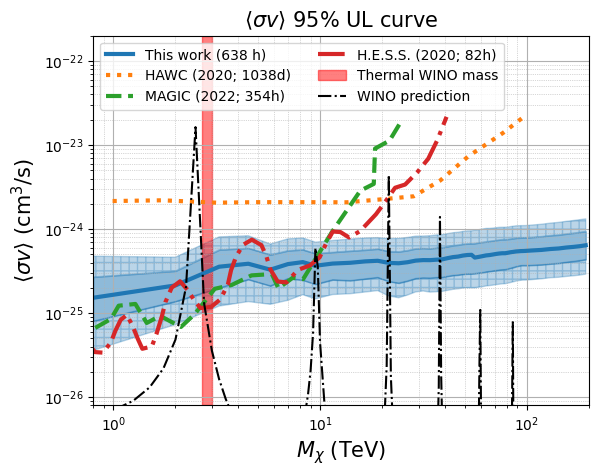

In [94]:
#plotULcurve("wino_nlo_lo_combined_binned", add_input="wino_nlo_hi_combined_binned", lw=3, label="This work (638 h)",units="TeV")
plotExpULcurve("EventDisplay_stacked_sys_wino_1D_final", units="TeV", add_mean=True, label="This work (638 h)")
plotPublication("wino", units="TeV")
plotPredictedLine(units="TeV", addRelic=True, color="k", ls="-.")
plt.xlim(0.8, 2e2)
plt.legend(loc=2, ncols=2)

In [ ]:
plot

In [8]:
print(line)

['24.163065668989407,', '1.7588992141594127e-23']


In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.interpolate import interp1d

# Read IRF

In [2]:
irf = np.load("UMa_II.npy")

In [3]:
table = Table(irf)
table

E_true,E_rec,EA,E_disp_1_sigma,PSF_68
float64,float64,float64,float64,float64
0.012589254117941675,0.0,0.0,0.0,nan
0.01995262314968879,0.0,0.0,0.0,nan
0.03162277660168379,0.0,0.0,0.0,nan
0.05011872336272725,0.0,0.0,0.0,nan
0.07943282347242814,0.0,0.5208278716165049,0.0,nan
0.12589254117941676,0.0,65.13785308156343,0.0,0.1418848003244826
...,...,...,...,...
501.18723362727354,0.0,0.0,0.0,nan
794.3282347242822,0.0,0.0,0.0,nan


## Effective area

Text(0, 0.5, 'Effective area (m^2)')

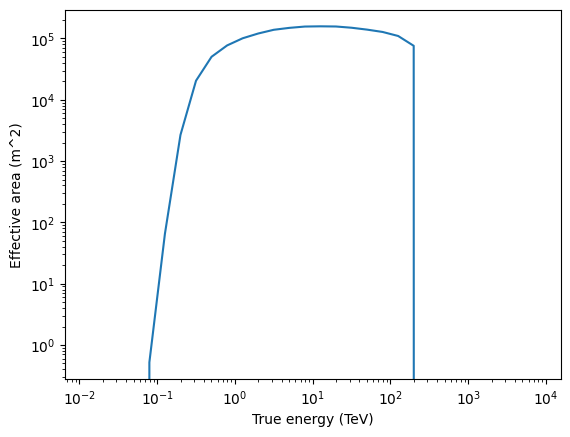

In [4]:
plt.loglog(table["E_true"], table["EA"])
plt.xlabel("True energy (TeV)")
plt.ylabel("Effective area (m^2)")

## Energy Bias

In [5]:
eg = table[20]
eg

E_true,E_rec,EA,E_disp_1_sigma,PSF_68
float64,float64,float64,float64,float64
125.89254117941661,118.99058263563514,109943.44209461553,0.1551743026164002,0.07343478752077323


Text(0, 0.5, 'Phi')

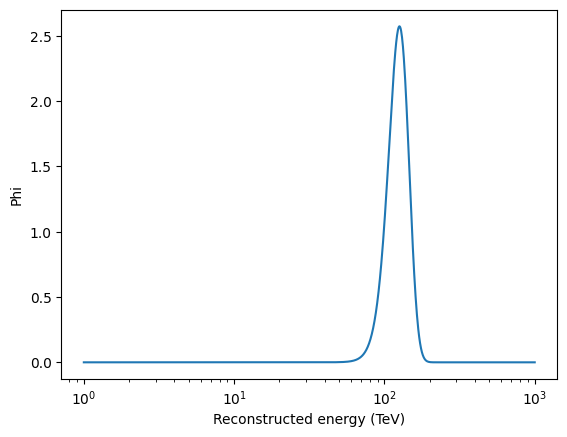

In [6]:
bias = norm(1, eg["E_disp_1_sigma"]).pdf
E_rec = np.geomspace(1, 1e3, 1000)
ratio = E_rec/eg["E_true"]
plt.plot(E_rec, bias(ratio))
plt.xscale("log")
plt.xlabel("Reconstructed energy (TeV)")
plt.ylabel("Phi")

# Read Spectrum

In [7]:
wino_spectra = Table(np.load("wino_dnde.npy"))
wino_spectra

x,dNdE,mass
float64,float64,float64
0.0001,1345.5770181772343,800.0
0.00012067926406393288,1304.887106069748,800.0
0.00014563484775012445,1259.4714708496267,800.0
0.00017575106248547912,1208.7953714692396,800.0
0.00021209508879201905,1152.6148036603424,800.0
0.0002559547922699536,1091.399699155268,800.0
...,...,...
0.32374575428176433,0.0003419631682374545,300000.0
0.3906939937054613,0.00023014376180425142,300000.0


In [8]:
mass = 1260.0 # MeV
spectrum = wino_spectra[wino_spectra["mass"]==mass]

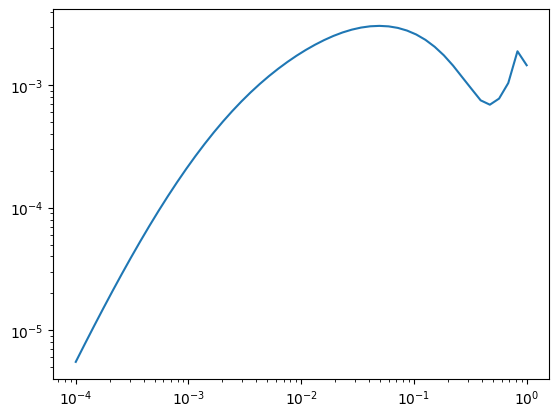

In [9]:
plt.loglog(spectrum["x"], spectrum["x"]**2.*spectrum["dNdE"])

# Get a Rough Estimate of the DM signal

### Actual signal

### $N(E) = \frac{<\sigma\nu>T_{obs}}{8\pi M^2} \int \frac{dN}{dE'}J(E')A(E')D(E|E')dE'$

### Here we simplify it

### $N(E) = \frac{1}{M^2} \int \frac{dN}{dE'}A(E')D(E|E')dE'$

In [10]:
mass_in_TeV = (1260.0/1000) # TeV

spectrum_interp = interp1d(spectrum["x"], spectrum["dNdE"])

In [11]:
dE_step = np.diff(np.log10(table["E_true"]))[0] # Equally spaced in the log10 space
dE_true = 10**np.arange(-2, 4.01, step=dE_step)[1:]-10**np.arange(-2, 4.01, step=dE_step)[:-1]
print(len(table["E_true"]), len(dE_true))

# Assuming that the true- and reconstructed-energy bins are the same.
E_rec = 10**np.arange(-2, 2, step=0.04)
dE_rec = 10**np.arange(-2.02, 2, step=0.04)[1:]-10**np.arange(-2.02, 2, step=0.04)[:-1]
print(len(E_rec), len(dE_rec))

30 30
100 100


In [12]:
signal = np.zeros(len(E_rec))

# For fluxes obtained in true energies, we re-distribute them with the energy bias.
for i, tab in enumerate(table):
    if tab["E_true"]<mass_in_TeV:
        dnde = spectrum_interp(tab["E_true"]/mass_in_TeV)
    else:
        continue
    ea = tab["EA"]
    de = dE_true[i]
    
    if tab["E_disp_1_sigma"]!=0:
        gaussian = norm(tab["E_rec"]/tab["E_true"], tab["E_disp_1_sigma"]).pdf
        disp = gaussian(E_rec/tab["E_true"])*dE_rec
        disp = disp/sum(disp) # re-normalized since the integral of 'disp' should be 1.
    else: 
        continue
    signal+=disp*ea*de*dnde
signal /= mass_in_TeV**2.

Text(0, 0.5, 'Flux')

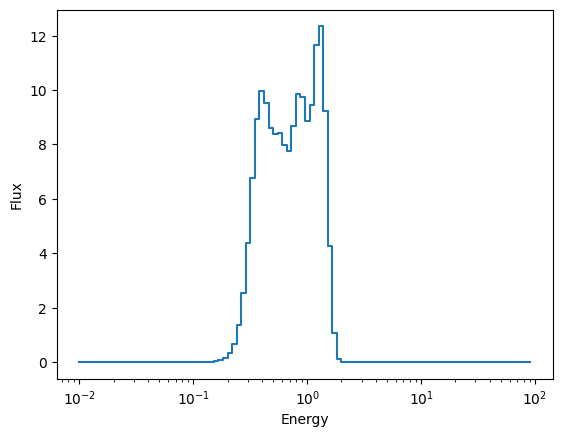

In [13]:
plt.step(E_rec, signal, where="mid")
plt.xscale("log")
plt.xlabel("Energy")
plt.ylabel("Flux")